<a href="https://colab.research.google.com/github/githubuser5544/Topsis_pre_trained/blob/main/Topsis_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Matrix:
        BLEU  Perplexity  Inference_Time  Model_Size
GPT-2  32.5        18.2             120         500
BART   34.8        16.5             150        1600
T5     36.2        15.1             140         900
XLNet  31.4        19.3             130         800

Normalized Matrix:
            BLEU  Perplexity  Inference_Time  Model_Size
GPT-2  0.481089    0.524517        0.442928    0.242251
BART   0.515135    0.475524        0.553660    0.775203
T5     0.535859    0.435177        0.516749    0.436051
XLNet  0.464806    0.556219        0.479839    0.387601

Weighted Normalized Matrix:
            BLEU  Perplexity  Inference_Time  Model_Size
GPT-2  0.192436    0.157355        0.088586    0.024225
BART   0.206054    0.142657        0.110732    0.077520
T5     0.214344    0.130553        0.103350    0.043605
XLNet  0.185922    0.166866        0.095968    0.038760

Final TOPSIS Result:
        BLEU  Perplexity  Inference_Time  Model_Size  TOPSIS_Score  Rank
T5     36.2     

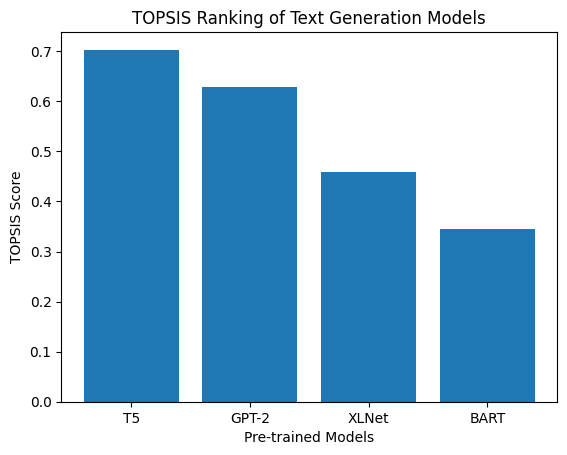

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Decision Matrix
# -------------------------------
models = ["GPT-2", "BART", "T5", "XLNet"]

data = {
    "BLEU": [32.5, 34.8, 36.2, 31.4],          # Benefit
    "Perplexity": [18.2, 16.5, 15.1, 19.3],    # Cost
    "Inference_Time": [120, 150, 140, 130],    # Cost (ms)
    "Model_Size": [500, 1600, 900, 800]        # Cost (MB)
}

df = pd.DataFrame(data, index=models)
print("Decision Matrix:\n", df)

# -------------------------------
# Step 2: Weights & Criteria Type
# -------------------------------
weights = np.array([0.4, 0.3, 0.2, 0.1])  # Sum = 1
criteria_type = np.array([1, -1, -1, -1])  # 1 = Benefit, -1 = Cost

# -------------------------------
# Step 3: Normalize Matrix
# -------------------------------
normalized_matrix = df / np.sqrt((df ** 2).sum())
print("\nNormalized Matrix:\n", normalized_matrix)

# -------------------------------
# Step 4: Weighted Normalization
# -------------------------------
weighted_matrix = normalized_matrix * weights
print("\nWeighted Normalized Matrix:\n", weighted_matrix)

# -------------------------------
# Step 5: Ideal Best & Worst
# -------------------------------
ideal_best = []
ideal_worst = []

for i in range(len(criteria_type)):
    if criteria_type[i] == 1:
        ideal_best.append(weighted_matrix.iloc[:, i].max())
        ideal_worst.append(weighted_matrix.iloc[:, i].min())
    else:
        ideal_best.append(weighted_matrix.iloc[:, i].min())
        ideal_worst.append(weighted_matrix.iloc[:, i].max())

ideal_best = np.array(ideal_best)
ideal_worst = np.array(ideal_worst)

# -------------------------------
# Step 6: Distance Calculation
# -------------------------------
distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

# -------------------------------
# Step 7: TOPSIS Score
# -------------------------------
topsis_score = distance_worst / (distance_best + distance_worst)

# -------------------------------
# Step 8: Ranking
# -------------------------------
result = df.copy()
result["TOPSIS_Score"] = topsis_score
result["Rank"] = result["TOPSIS_Score"].rank(ascending=False)

result = result.sort_values("Rank")
print("\nFinal TOPSIS Result:\n", result)

# -------------------------------
# Step 9: Visualization
# -------------------------------
plt.figure()
plt.bar(result.index, result["TOPSIS_Score"])
plt.xlabel("Pre-trained Models")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Ranking of Text Generation Models")
plt.show()
